<a href="https://colab.research.google.com/github/btlgs2000/dl_intro/blob/master/lr_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
def lr_find(model, x, y, optimizer, loss, lr_log_min=-6, lr_log_max=0, subint_n=100, batch_size=32):
    ''' trova il learning rate ottimale

    args
    ----
    model: built
    x, y: train set
    optimizer: ottimizzatore
    loss: funzione di loss
    lr_log_min: log del min lr
    lr_log_max: log del max lr
    subint_n: num di divisioni
    num_batch: numero di batch per tentativo
    batch_size: numero di sample x batch

    ret
    ---
    learning rate ottimale
    '''

    # il modello è inizializzato
    # suddivisione logaritmica in subint_n intervalli
    if not model.built:
        raise ValueError('il modello deve non è inizializzato')

    initial_weights = model.get_weights()
    
    lrs = []
    losses = []
    for lr in tqdm(np.logspace(start=lr_log_min, stop=lr_log_max, num=subint_n)):
        model.compile(optimizer=optimizer(lr), loss=loss)
        model.set_weights(initial_weights)
        model.fit(x=x, y=y, shuffle=False, verbose=0)
        lrs.append(lr)
        losses.append(model.history.history['loss'])

    return lrs, losses

In [21]:
(x, y), _ = keras.datasets.mnist.load_data()

In [22]:
x = x / 255
y = tf.one_hot(y, 10)

In [27]:
model = keras.Sequential(
    [
     keras.Input(shape=(28, 28)),
     keras.layers.Flatten(),
     keras.layers.Dense(100, 'relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(100, 'relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(100, 'relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(100, 'relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(100, 'relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(10, 'softmax')
    ]
)

In [29]:
lrs_bn, losses_bn = lr_find(model, x[:32*50], y[:32*50], keras.optimizers.Adam, loss='categorical_crossentropy')

100%|██████████| 100/100 [02:11<00:00,  1.32s/it]


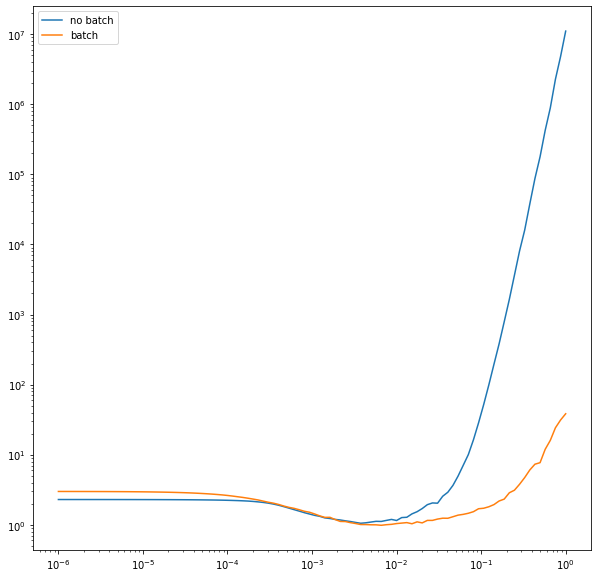

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(lrs, losses, label='no batch')
ax.plot(lrs_bn, losses_bn, label='batch')
plt.xscale('log')
plt.yscale('log')
ax.legend()

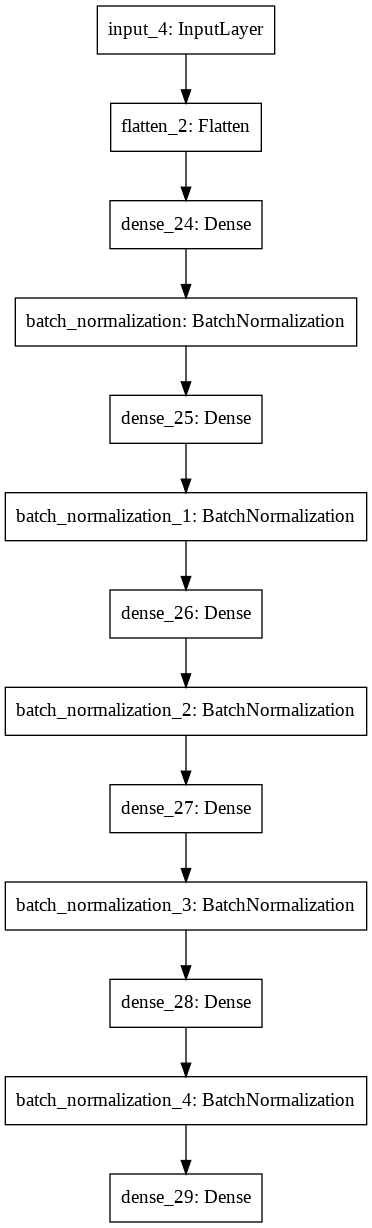

In [28]:
keras.utils.plot_model(model)